## Assignment 1: Machine Learning Methods

### \<Jing> \<a1899523>

#### How can we use data analytics to predict energy usage for this house?

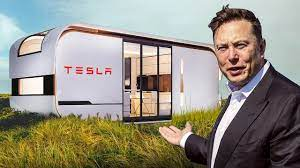


### 1. Read the dataset

In [1]:
import pyspark
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("energydata_complete-1.csv",decimal=",")
dl = data.values
dl

array([['2016-01-11 17:00:00', 60, 30, ..., ' 5.2999999999999998e+00',
        '13.2754331571049988270', '13.2754331571049988270'],
       ['2016-01-11 17:10:00', 60, 30, ..., ' 5.2000000000000002e+00',
        '18.6061949818395078182', '18.6061949818395078182'],
       ['2016-01-11 17:20:00', 50, 30, ..., ' 5.0999999999999996e+00',
        '28.6426681675948202610', '28.6426681675948202610'],
       ...,
       ['2016-05-27 17:40:00', 270, 10, ..., ' 1.3266666666666699e+01',
        '29.1991170844994485378', '29.1991170844994485378'],
       ['2016-05-27 17:50:00', 420, 10, ..., ' 1.3233333333333301e+01',
        ' 6.3227836508303880692', ' 6.3227836508303880692'],
       ['2016-05-27 18:00:00', 430, 10, ..., ' 1.3199999999999999e+01',
        '34.1188505874015390873', '34.1188505874015390873']], dtype=object)

In [16]:
# a backup function for display
def display_all(p):
    with pd.option_context("display.max_rows",1000,"display.max_columns",1000):
        display(p)
        
print(data.columns.tolist())
print(len(data.columns.tolist()))


['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
29


In [9]:
data.isnull().sum()
#so high quality data, all 0 null for features, and this is the last step of briefly read the data

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### 2. Analyse and visualise the data

<AxesSubplot:ylabel='Appliances'>

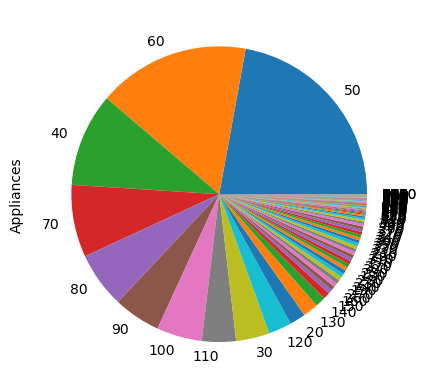

In [13]:
data["Appliances"].value_counts().plot.pie()

In [18]:
display_all(data.describe())
#detailed build-in function 

,Appliances,lights
count,19735.000000,19735.000000
mean,97.694958,3.801875
std,102.524891,7.935988
min,10.000000,0.000000
25%,50.000000,0.000000
50%,60.000000,0.000000
75%,100.000000,0.000000
max,1080.000000,70.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         19735 non-null  object
 1   Appliances   19735 non-null  int64 
 2   lights       19735 non-null  int64 
 3   T1           19735 non-null  object
 4   RH_1         19735 non-null  object
 5   T2           19735 non-null  object
 6   RH_2         19735 non-null  object
 7   T3           19735 non-null  object
 8   RH_3         19735 non-null  object
 9   T4           19735 non-null  object
 10  RH_4         19735 non-null  object
 11  T5           19735 non-null  object
 12  RH_5         19735 non-null  object
 13  T6           19735 non-null  object
 14  RH_6         19735 non-null  object
 15  T7           19735 non-null  object
 16  RH_7         19735 non-null  object
 17  T8           19735 non-null  object
 18  RH_8         19735 non-null  object
 19  T9           19735 non-nu

In [20]:
data['date'].nunique()
# mess enough not to do any classification, as date have month/day/time in a day all combined (even climate change
# if you are serious enough)

19735

In [115]:
data['lights'].nunique()
#only 8 values in lights
data['Appliances'].nunique()
#92 levels on appliances

92

In [ ]:
# correlation check of the tempratures
import scipy.stats
#scipy.stats.pearsonr(data[1],data[2]), better in a loop
for  in data.columns():
    for in :
        scipy.stats.pearsonr(data[1],data[2]
# somehow I didn't use it                             

In [137]:
from sklearn.preprocessing import StandardScaler
features = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']
x_ = data.loc[:, features].values
Y_ = y = data.loc[:,['Appliances']].values
x_ = StandardScaler().fit_transform(x_)

In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

NameError: name 'Appliances' is not defined

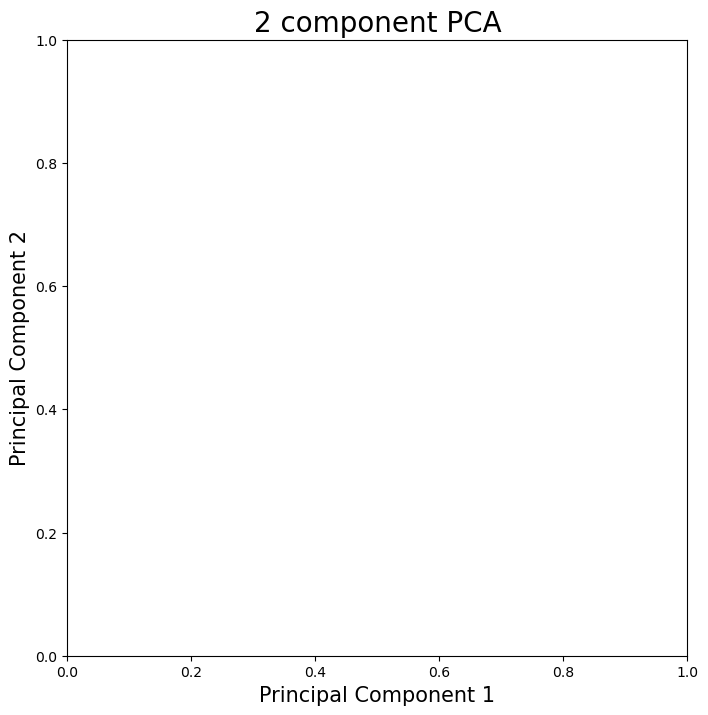

In [142]:
finalDf = pd.concat([principalDf, data[['Appliances']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Appliances'] == Appliances
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#actully the RHs and Ts need lower dimensions so as for better results,
But unfortunately this happened after my model run. 
So this is my lesson learnt

### 3. Implement prediction models

In [74]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

dl = data.values
x_traindata = data.drop(columns = ['Appliances'])
y_traindata = data.loc[:,["Appliances"]]
#print(y_traindata)

In [79]:
print(type(dl))
print(type(data))
print(y_traindata)
print(type(y_traindata))
print(x_traindata.shape)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
       Appliances
0              60
1              60
2              50
3              50
4              60
...           ...
19730         100
19731          90
19732         270
19733         420
19734         430

[19735 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
(19735, 28)


In [27]:
xgb = XGBClassifier(use_lable_encoder = False)
le = LabelEncoder()

In [58]:
# parameters provided
seed = 29
ts = 0.61

### 4. Train prediction models

In [116]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit( test_size= ts,random_state=seed)
for train_idx, test_idx in sss.split(x_traindata, y_traindata):
    x_train = x_traindata[train_idx]
    y_trian = y_traindata[train_idx]
    x_val = x_traindata[test_idx]
    y_val = y_traindata[test_idx]
    
xgb.fit(x_train,y_trian)
sss.get_n_splits(X, y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [63]:
prediction = xgb.predict_proba(x_val)


NameError: name 'x_val' is not defined

In [131]:
#Using Kfolder way for data split as SSS is having error
from sklearn.model_selection import KFold
kf = KFold(n_splits=30)
kf.get_n_splits(X)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  658   659   660 ... 19732 19733 19734]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226

### 5. Test predictin models and show results

In [66]:
from sklearn.metrics import log_loss, accuracy_score
print("Validation logloss:{}".format(log_loss(y_val,prediction)))

NameError: name 'y_val' is not defined

In [67]:
pred_val = xgb.predict(x_val)
accu = accuracy_score(y_val,pred_val)
print("Accuracy:%.3f%%" %(accu *100.0))

NameError: name 'x_val' is not defined

In [82]:
###### Using Ridge and GD with numpy and pandas to compute the deviation 
###### and draw the plot, give MSE calculated


X = data.drop(columns = ["date",'Appliances'])
#discord date so as to have all numerics
Y = data.iloc[:,1]
Y = Y - Y.mean()
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [90]:
print(f"Feature Means: {scaled_X.mean(axis=0)}")               # all effectively equal to 0
print(f"Feature Variances: {scaled_X.var(axis=0)}")            # all effectively equal to 1
split_point = scaled_X.shape[0] // 2
X_train = scaled_X[:split_point]
X_test = scaled_X[split_point:]
Y_train = Y[:split_point].to_numpy()
Y_test = Y[split_point:].to_numpy()
print('\item first row X\_train:' , np.array2string(X_train[0], separator=','))
print('\item last row X\_train:' , np.array2string(X_train[-1], separator=','))
print('\item first row X\_test:' , np.array2string(X_test[0], separator=','))
print('\item last row X\_test: ', np.array2string(X_test[-1], separator=','))
print('\item first row Y\_train: ', np.array2string(Y_train[0], separator=','))
print('\item last row Y\_train: ', np.array2string(Y_train[-1], separator=','))
print('\item first row Y\_test: ', np.array2string(Y_test[0], separator=','))
print('\item last row Y\_test: ', np.array2string(Y_test[-1], separator=','))

Feature Means: [ 0.00000000e+00  1.38256099e-15  6.91280493e-17 -9.21707324e-17
 -6.97041164e-16 -8.75621958e-16  2.20345657e-15 -5.99109760e-16
  8.46818604e-16  4.60853662e-16 -2.88033539e-17  4.60853662e-17
  1.61298782e-16  1.70515855e-15  1.08300611e-15  1.79732928e-15
  5.53024394e-16  9.21707324e-16 -1.02539940e-15 -1.38256099e-16
  1.68874064e-14 -2.30426831e-16  1.26734757e-16  1.09452745e-16
  9.21707324e-17  7.68689506e-17  7.68689506e-17]
Feature Variances: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
\item first row X\_train: [ 3.30126384,-1.11864475, 1.84382063,-0.52041138, 1.07368343,-1.23506343,
  1.68612997,-0.90821667, 1.50643758,-1.31490324, 0.47116038,-0.14519618,
  0.95179837,-1.45364639, 1.21986131,-1.95750878, 1.14157236,-1.21732362,
  0.95813624,-0.15264674,-2.97632767, 0.82208042, 1.20769354, 2.09159642,
  0.3669753 ,-0.80797358,-0.80797358]
\item last row X\_train: [-0.47907978,-0.3652318 ,-1.02024058,-0.93538358,-0.29435

In [93]:
n = X_train.shape[0]
p = X_train.shape[1]
phi = 0.5
betaRidge = (1/n)*np.linalg.inv( (1/n) *X_train.T @ X_train+ phi * np.eye(p)) @ X_train.T @ Y_train
print(betaRidge)

# using sklearn
from sklearn.linear_model import Ridge
ridgeModwInt = Ridge(alpha=0.5*n, fit_intercept=True).fit(X_train,Y_train)
ridgeModwInt.coef_

[16.47926232 -1.05884777  8.72836741  5.7615169  -7.40426197  5.87313947
  8.27384524 -0.64361838  0.32933933 -3.44165779 -1.53847049  2.89571558
  1.09730301 -1.53460905 -4.66252579  0.34776487 -9.88591601 -2.3383224
 -5.31664735  1.69643762 -1.15568379 -4.64102088  1.87686074  0.47322338
 -0.7216034  -0.40756674 -0.40756674]


array([16.21137166, -1.15472623,  8.84544495,  5.91816981, -7.28007071,
        6.37004884,  8.06297065, -0.49808215,  0.40524338, -2.7504823 ,
       -1.71730496,  3.33325581,  0.29811294, -1.12755904, -4.40299894,
        0.37566555, -9.75559544, -1.71884914, -5.65299517,  2.10797484,
       -1.15359965, -4.67168587,  1.34686376,  0.47197227, -0.29810665,
       -0.41091034, -0.41091034])

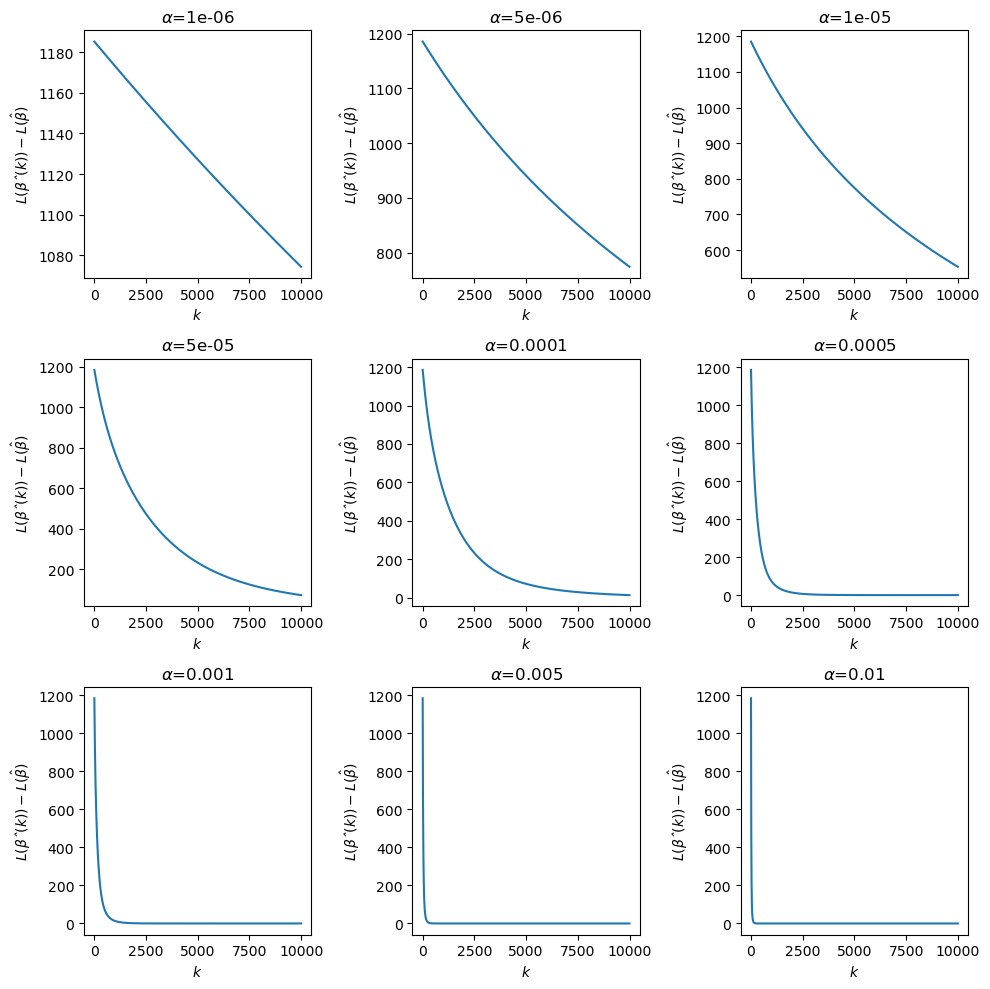

train MSE:  10400.979284880375
test  MSE:  8492.308792634994


In [113]:
phi = 0.5
n = X_train.shape[0]
p = X_train.shape[1]

n_epochs = 10000
n_iter = n_epochs
alphas = [0.000001, 0.000005, 0.00001,  0.00005, 0.0001,   0.0005, 0.001, 0.005, 0.01] #rate to choose
beta_star = np.linalg.inv(X_train.T @ X_train + n * phi * np.eye(p)) @ X_train.T @ Y_train

def loss(beta, X, y):
    return (1/n) * np.linalg.norm(y-X@beta)**2 + phi * np.linalg.norm(beta)**2

def calc_grad(beta, X, y):
    return -(2/n) * X.T @ (y - X @ beta) + 2 * phi * beta

fig, axes = plt.subplots(3,3,figsize=(10,10))
for i, ax in enumerate(axes.flat):
    betas = np.zeros((n_iter, p))
    betas[0] = np.ones(p)
    loss_diffs = np.ones(n_iter) * np.inf
    loss_diffs[0] = loss(betas[0], X_train, Y_train) - loss(beta_star, X_train,Y_train)
    alpha = alphas[i]
    for j in range(1, n_iter):
        betas[j] = betas[j-1] - alpha * calc_grad(betas[j-1], X_train, Y_train)
        loss_diffs[j] = loss(betas[j], X_train, Y_train) - loss(beta_star, X_train,Y_train)
    
    ax.plot(np.arange(n_iter), loss_diffs)
    ax.set_title(rf'$\alpha$={alpha}')
    ax.set_ylabel(r'$L(\betaˆ{(k)}) - L(\hat{\beta})$')
    ax.set_xlabel(rf'$k$')
plt.tight_layout()
plt.savefig("figures/batchGD.png", dpi=800)
plt.show()

def MSE(beta, X, y):
    n = X.shape[0]  
    return (1/n) * np.linalg.norm(y-X@beta)**2

print("train MSE: ", MSE(betas[-1], X_train, Y_train))
print("test  MSE: ", MSE(betas[-1], X_test, Y_test))
#seems that the 0.001 or 0.005 is best, quick converge

The above implemented is ˆRidge =((n1)XTX+φI)−1(n1)XTy=(XTX+nφI)−1XTy
there are a few variants of gradient descent, so GD is our choice
β(k+1) =β(k) −αk∇L(β(k)), k=0,1,2,...,
.....
Li(β) := (yi − xTi β)2 + φ∥β∥2.
output is like
i) The train MSE: n1 ∥ytrain − Xtrainβ(K)∥2 
ii) The test MSE: n1 ∥ytest − Xtestβ(K)∥2
After converge the diff is very low

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [133]:
#print(data.iloc[:,0])

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object


In [134]:
#Using Linear Regression
LRmodel = LogisticRegression(solver= 'liblinear')

YY = data.iloc[:,1]
result = cross_val_score(LRmodel , X, YY, cv = kf,error_score='raise') 
print("Avg accuracy: {}".format(result.mean()))
#the LR for the multi-features is bad in performance, exact level

Avg accuracy: 0.24368009388411604


As Appliances is having 92 levels, actually 0.25 of exact level is acceptable, if set |res-real|< 3 nerbouring levels then that will be extremely high accuracy

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [ ]:
#From the above results as rolled out - LR and Ridge with Gradient Descent, Ridge with GD is much better
#After converge the Ridge with GD is better

### 7. Reflect on what you have learned by completing this assignment

#On data preprocessing, Explore and Exploit, NA values, count of levels/uniques,pie chart, 

# on model implementation: how to implement a LinearRegression model with Ridge and how to use sklearn to implement
# a Linear Regression 
##The wheel-making way of Ridge is not an easy task, it cost me tons of time to debug the code in matrix computing 
#and loop, the other LR is like "go to the dictionary"

# On visualization: how to use sns.violin, how to index the subproblems and plot the result in a easy-comparing way


#will still be looking for reason why my StratifiedShuffleSplit just failed in the y class
#also known that date can be changed like: data['date'].apply(lambda x: x.strttime("%y%m%d%h").apply(lambda x: int(x)))

### 8. References

sklearn official page
seaborn official page
numpy and pandas official page
stack over flow questions for implementation issues
https://builtin.com/machine-learning/pca-in-python 